# Fisher线性判别

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from numpy.linalg import cholesky
%matplotlib inline

## 生成数据

In [2]:
def genData(M, N = 100):
    rnd.seed(0)
    Sigma = np.array([[1, 0], [0, 1]])
    R = cholesky(Sigma)
    
    mu = np.array([[-M, 0]])
    s1 = np.dot(np.random.randn(N, 2), R) + mu
    mu = np.array([[M, 0]])
    s2 = np.dot(np.random.randn(N, 2), R) + mu
    
    one = np.ones(s1.shape[0]).reshape(100,1)
    
    s1 = np.concatenate((s1, -1 * one), axis = 1)
    s2 = np.concatenate((s2,  1 * one), axis = 1)
    s_t = np.concatenate((s1, s2), axis=0)
    s = np.concatenate((np.ones((s_t.shape[0],1)), s_t), axis=1)
    
    return s

In [3]:
S = genData(2)
# print(S[:3], S[-3:])

## 生成绘制图像

In [4]:
def genPlt(S, w, plt):
    y = np.linspace(-3,3)
    x = (w[0] + w[2] * y)/w[1]

    plt.plot(S[:101,1],S[:101,2],'+')
    plt.plot(S[101:,1],S[101:,2],'o')
    plt.plot(x,y)
    
    return plt

## Fisher判别函数

In [12]:
def cal_cov_and_avg(samples): # 计算协方差和均值
    u1 = np.mean(samples, axis=0)
    cov_m = np.zeros((samples.shape[1], samples.shape[1]))
    for s in samples:
        t = s - u1
        cov_m += t * t.T
    return cov_m, u1


def fisher(c_1, c_2): # 运用fisher判别法计算分类面
    cov_1, u1 = cal_cov_and_avg(c_1)
    cov_2, u2 = cal_cov_and_avg(c_2)
    s_w = cov_1 + cov_2
    s_w_inv = np.linalg.pinv(s_w)
    return np.dot(s_w_inv, u1 - u2)

## 训练

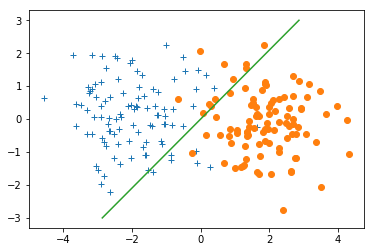

[ 0.         -0.00318603 -0.00303943]


In [19]:
cov1, u1 = cal_cov_and_avg(S[:S.shape[0]//2, :-1])
# print(cov1, '\n\n\n\n\n', u1)
cov2, u2 = cal_cov_and_avg(S[S.shape[0]//2:, :-1])
# print(cov2, '\n\n\n\n\n', u2)
w = fisher(S[:S.shape[0]//2, :-1],S[S.shape[0]//2:, :-1])
plt = genPlt(S, w, plt)
print(w)

**绘制分类面:**

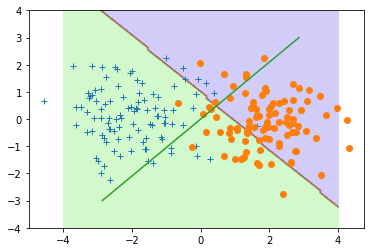

In [21]:
def Predict(w,x,y):
    y_t = w[0] + w[1] * x[:,0] + w[2] * x[:,1] 
    y_t[y_t>y] = 1
    y_t[y_t<y] = -1
    return y_t

def plot_hyperplane(w,c_1,c_2,plt):
    m1 = 1/c_1.shape[0] * np.sum(w[0] + w[1] * c_1[:,0] + w[2] * c_1[:,1])
    m2 = 1/c_2.shape[0] * np.sum(w[0] + w[1] * c_2[:,0] + w[2] * c_2[:,1])
    y = (m1 + m2) / 2 
    
    x0s = np.linspace(-4, 4, 100)
    x1s = np.linspace(-4, 4, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    y_pred = Predict(w, X, y).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    return plt

plt = genPlt(S, w, plt)
plt = plot_hyperplane(w, S[:S.shape[0]//2, :-1],S[S.shape[0]//2:, :-1],plt)   
plt.show()

# 结论

通过绘制分类面以及fisher判别得到的方向向量,可以发现在一定程度上,fisher判别能够做到较好的分类但是如果数据本身的方差较大可能分类情况就会较差.